# Data Exploration

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from config import val_split_seed


C:\Users\vanes\AppData\Local\Temp\ipykernel_2264\2668765324.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\vanes\AppData\Local\Temp\ipykernel_2264\2668765324.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
a = pd.read_csv("./BankA.csv")
b = pd.read_csv("./BankB.csv")
c = pd.read_csv("./BankC.csv")

In [5]:
a_samp = a.sample(n=100)
b_samp = b.sample(n=100)
c_samp = c.sample(n=100)

# a_b_samp = a_samp.append(b_samp, ignore_index=True)
# all_samp = a_b_samp.append(c_samp, ignore_index=True)

all_samp = pd.concat([a_samp, b_samp, c_samp], ignore_index=True)

c:\Users\vanes\Desktop\Master DataIntelligence\FML\FML_2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vanes\Desktop\Master DataIntelligence\FML\FML_2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vanes\Desktop\Master DataIntelligence\FML\FML_2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vanes\Desktop\Master DataIntelligence\FML\FML_2\.venv\Lib\site-packages\seaborn

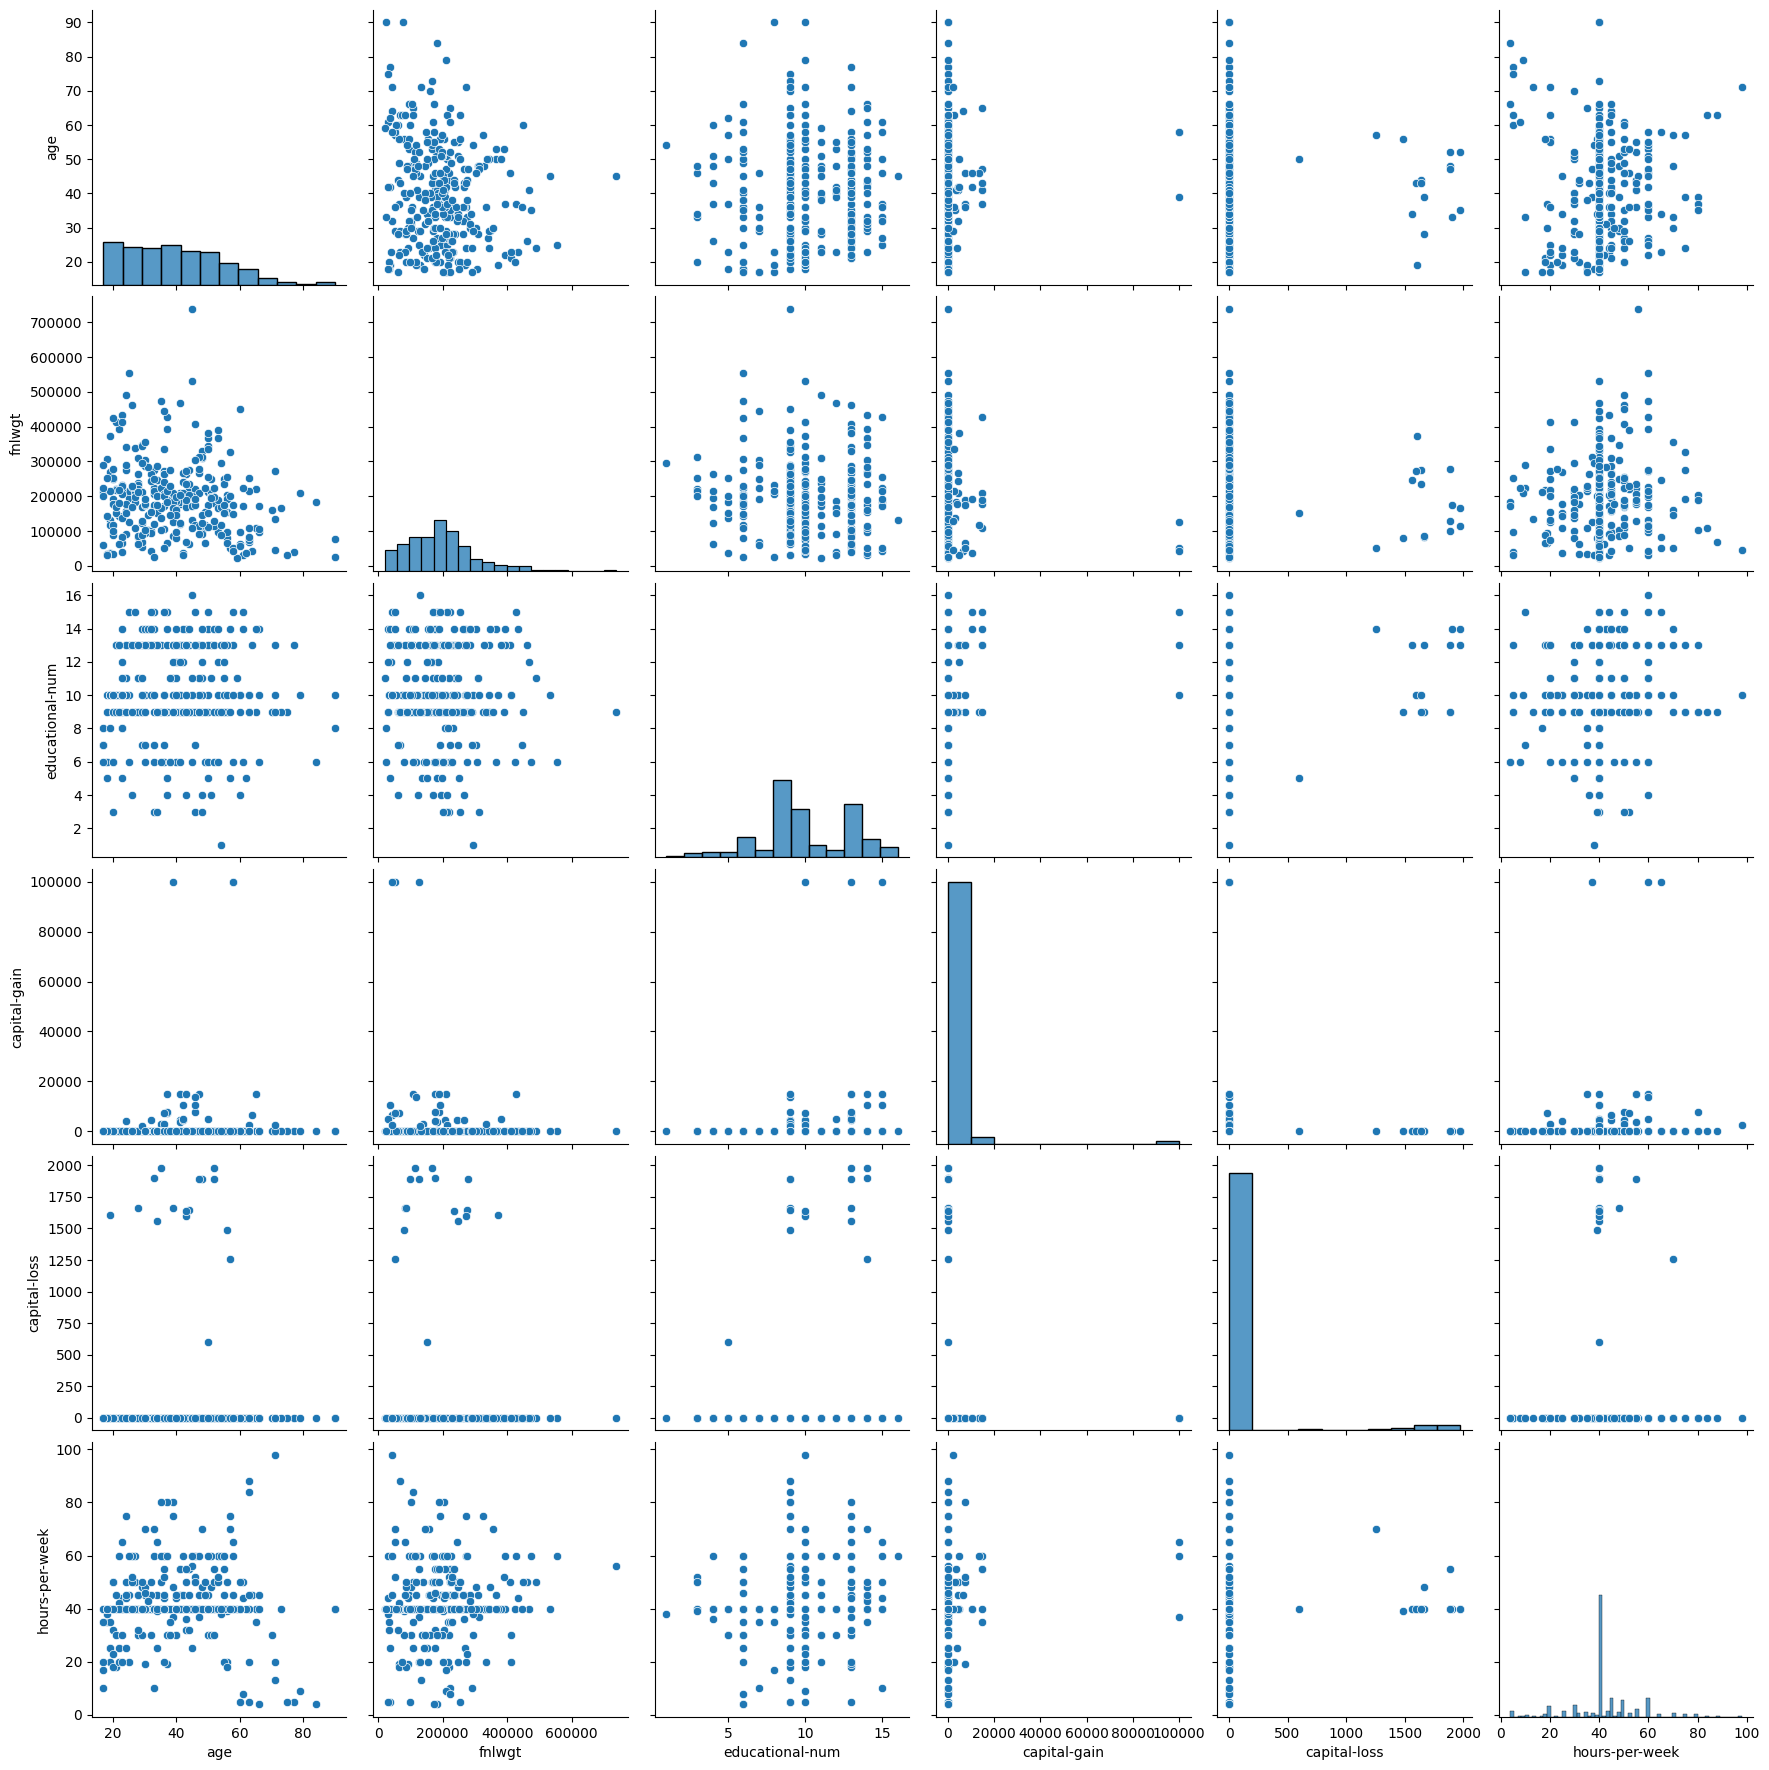

In [6]:
sns.pairplot(all_samp, height=3);

In [7]:
profile = ProfileReport(all_samp, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
all_samp.head(3)

institute  age     workclass  fnlwgt     education  educational-num  \
0    Bank A   37       Private  427863   Prof-school               15   
1    Bank A   45       Private  131467     Doctorate               16   
2    Bank A   53  Self-emp-inc   96925  Some-college               10   

       marital-status       occupation relationship   race  gender  \
0  Married-civ-spouse  Exec-managerial         Wife  White  Female   
1  Married-civ-spouse   Prof-specialty      Husband  White    Male   
2  Married-civ-spouse  Farming-fishing      Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0         15024             0              60  United-States   >50K  
1             0             0              60              ?   >50K  
2             0             0              60  United-States  <=50K

In [9]:
# Native Country (Rassistisch?)
# Gender (sexismus)
# Race (Rassistisch!)
# Relationship (Husband, Wife einfach zu Married?)
# Educational-num oder education weg, je nach dem ob one hot encoding oder nicht

In [10]:
df = pd.concat([a, b, c], ignore_index=True)

In [11]:
drop_this = ["institute","education","race","gender","native-country"]
df = df.drop(drop_this, axis = 1)

In [12]:
df.loc[df["relationship"].isin(["Husband", "Wife"]), "relationship"] = "Married"

In [13]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
income             object
dtype: object

In [14]:
df = pd.get_dummies(df, columns=["workclass", "marital-status", "occupation", "relationship"])

In [15]:
df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   39  208353               13          7298             0              50   
1   42  189986               13             0             0              55   
2   56  321827               13             0             0              15   
3   34   33945               13             0             0              40   
4   66   31438               13         15024             0              40   

  income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0   >50K        False                  False                False  ...   
1   >50K        False                  False                False  ...   
2  <=50K         True                  False                False  ...   
3  <=50K        False                  False                False  ...   
4   >50K        False                  False                False  ...   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                      False                       False             False   
1                      False                       False             False   
2                      False                       False             False   
3                      False                       False              True   
4                      False                       False              True   

   occupation_Tech-support  occupation_Transport-moving  relationship_Married  \
0                    False                        False                  True   
1                     True                        False                  True   
2                    False                        False                 False   
3                    False                        False                  True   
4                    False                        False                  True   

   relationship_Not-in-family  relationship_Other-relative  \
0                       False                        False   
1                       False                        False   
2                       False                         True   
3                       False                        False   
4                       False                        False   

   relationship_Own-child  relationship_Unmarried  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  

[5 rows x 43 columns]

In [16]:
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=val_split_seed)

In [17]:
# Modelle für Klassifikation
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

# Evaluation Metriken für Klassifikation
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Cohen\'s Kappa': []}

# Modellentwicklung und Evaluation
for model_name, model in models.items():
    # Modell anpassen
    model.fit(X_train, y_train)
    
    # Vorhersagen
    predictions = model.predict(X_test)
    
    # Metriken
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='>50K')
    recall = recall_score(y_test, predictions, pos_label='>50K')
    f1 = f1_score(y_test, predictions, pos_label='>50K')
    kappa = cohen_kappa_score(y_test, predictions)
    
    # Ergebnisse speichern
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Cohen\'s Kappa'].append(kappa)
    
    # Metriken anzeigen
    print("Klassifikationsbericht:\n", classification_report(y_test, predictions))
    print(f"{model_name}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nCohen's Kappa: {kappa:.2f}\n{'='*40}")

# Ergebnisse in ein DataFrame konvertieren, um sie besser zu visualisieren
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

c:\Users\vanes\Desktop\Master DataIntelligence\FML\FML_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87    120205
        >50K       0.71      0.27      0.39     39795

    accuracy                           0.79    160000
   macro avg       0.75      0.62      0.63    160000
weighted avg       0.78      0.79      0.75    160000

Logistic Regression
Accuracy: 0.79
Precision: 0.71
Recall: 0.27
F1 Score: 0.39
Cohen's Kappa: 0.29
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87    120205
        >50K       0.61      0.62      0.61     39795

    accuracy                           0.81    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.81      0.81      0.81    160000

Decision Tree
Accuracy: 0.81
Precision: 0.61
Recall: 0.62
F1 Score: 0.61
Cohen's Kappa: 0.48
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.88 

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756

In [18]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Für binäre Klassifikation

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Konvertieren der Daten in Tensoren (sollte das auf 0-1 skaliert sein?)
X_train_tensor = tf.convert_to_tensor(np.asarray(X_train).astype('float32'))
y_train_tensor = tf.convert_to_tensor(np.asarray(y_train).astype('float32'))
X_test_tensor = tf.convert_to_tensor(np.asarray(X_test).astype('float32'))
y_test_tensor = tf.convert_to_tensor(np.asarray(y_test).astype('float32'))

# Trainieren des Modells
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32)

# Bewertung des Modells
loss, accuracy = model.evaluate(X_test_tensor, y_test_tensor)

results['Model'].append('Neural Network')
results['Accuracy'].append(accuracy)
results['Precision'].append(np.nan)
results['Recall'].append(np.nan)
results['F1 Score'].append(np.nan)
results['Cohen\'s Kappa'].append(np.nan)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)



Epoch 1/10


20000/20000 [==============================] - 33s 2ms/step - loss: 52.9030 - accuracy: 0.6844
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 6.0527 - accuracy: 0.7249
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.8349 - accuracy: 0.7738
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4855 - accuracy: 0.7922
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.4281 - accuracy: 0.8061
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.3968 - accuracy: 0.8162
Epoch 7/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3840 - accuracy: 0.8212
Epoch 8/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3782 - accuracy: 0.8233
Epoch 9/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3751 - accuracy: 0.8245
Epoch 10/10
5000/5000 [===========================

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
4       Neural Network  0.803119        NaN       NaN       NaN            NaN
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756

# Neural Network

In [20]:
input_shape = [X_train.shape[1]]

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [26]:
# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.3531 - binary_accuracy: 0.8370 - val_loss: 0.3397 - val_binary_accuracy: 0.8412
Epoch 2/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3440 - binary_accuracy: 0.8411 - val_loss: 0.3416 - val_binary_accuracy: 0.8422
Epoch 3/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3414 - binary_accuracy: 0.8428 - val_loss: 0.3428 - val_binary_accuracy: 0.8425
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.3401 - binary_accuracy: 0.8429 - val_loss: 0.3429 - val_binary_accuracy: 0.8418
Epoch 5/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3396 - binary_accuracy: 0.8437 - val_loss: 0.3422 - val_binary_accuracy: 0.8416
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3392 - binary_accuracy: 0.8435 - val_loss: 0.3431 - val_binary_accuracy: 0.8413
Epoch 7/10
20000/20000 [==========

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)

5000/5000 [==============================] - 7s 1ms/step - loss: 0.3500 - binary_accuracy: 0.8381


In [28]:
results['Model'].append('Neural Network_V2')
results['Accuracy'].append(accuracy)
results['Precision'].append(np.nan)
results['Recall'].append(np.nan)
results['F1 Score'].append(np.nan)
results['Cohen\'s Kappa'].append(np.nan)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
5    Neural Network_V2  0.838087        NaN       NaN       NaN            NaN
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
4       Neural Network  0.803119        NaN       NaN       NaN            NaN
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756

<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

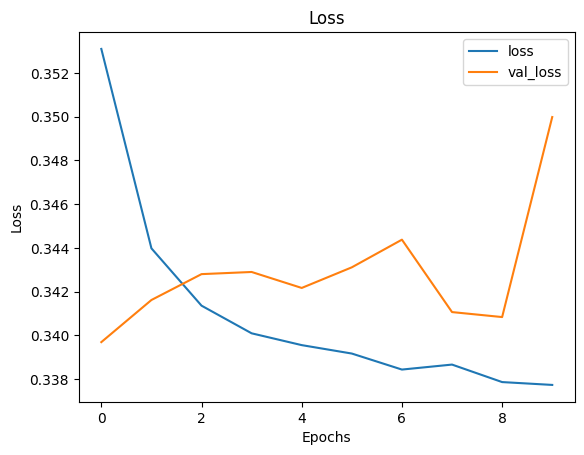

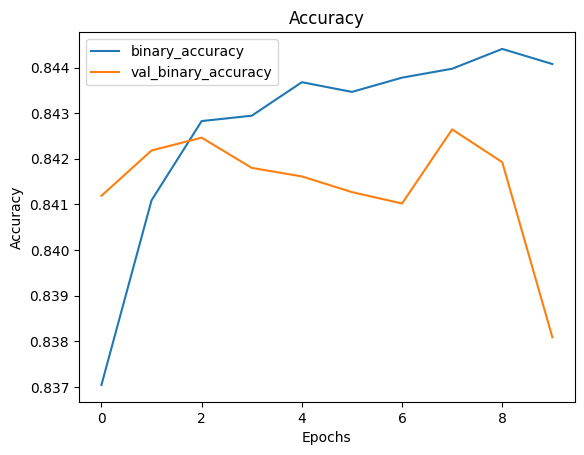

In [29]:
history_df = pd.DataFrame(history.history)
loss = history_df.loc[:, ['loss', 'val_loss']]
acc = history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']]
loss.plot(title="Loss", xlabel='Epochs', ylabel='Loss')
acc.plot(title="Accuracy", xlabel='Epochs', ylabel='Accuracy')

# Train Models for each Bank separately

In [ ]:

# Load BankA.csv
bankA_df = pd.read_csv('BankA.csv')
print(bankA_df.shape)

# Load BankB.csv
bankB_df = pd.read_csv('BankB.csv')
print(bankB_df.shape)

# Load BankC.csv
bankC_df = pd.read_csv('BankC.csv')
print(bankC_df.shape)


In [ ]:
np.random.seed(42) 

In [ ]:
bankA_df.head(3)

In [ ]:
# Define function to split data into train and test sets

def split_data(df):
    # Drop "race" and "gender" columns
    df_processed = df.drop(['race', 'gender'], axis=1)
    
    # Encode categorical variables
    label_encoders = {}
    for column in df_processed.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df_processed[column] = label_encoders[column].fit_transform(df_processed[column])
    
    # Split data into features and target variable
    X = df_processed.drop('income', axis=1)
    y = df_processed['income']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


In [ ]:
# Define function to train logistic regression model
def train_model(X_train, X_test, y_train, y_test, model):
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return model, train_score, test_score


In [ ]:
# Split data for Bank A
X_trainA, X_testA, y_trainA, y_testA = split_data(bankA_df)

# Split data for Bank B
X_trainB, X_testB, y_trainB, y_testB = split_data(bankB_df)

# Split data for Bank C
X_trainC, X_testC, y_trainC, y_testC = split_data(bankC_df)


In [ ]:
LogReg = LogisticRegression(max_iter=1000)

# Train logistic regression models for each dataframe
bankA_model_log, bankA_train_score_log, bankA_test_score_log = train_model(X_trainA, X_testA, y_trainA, y_testA, model=LogReg)
bankB_model_log, bankB_train_score_log, bankB_test_score_log = train_model(X_trainB, X_testB, y_trainB, y_testB, model=LogReg)
bankC_model_log, bankC_train_score_log, bankC_test_score_log = train_model(X_trainC, X_testC, y_trainC, y_testC, model=LogReg)

# Display training and testing scores for each model
print("Bank A - Training Score:", bankA_train_score_log)
print("Bank A - Testing Score:", bankA_test_score_log)
print("Bank B - Training Score:", bankB_train_score_log)
print("Bank B - Testing Score:", bankB_test_score_log)
print("Bank C - Training Score:", bankC_train_score_log)
print("Bank C - Testing Score:", bankC_test_score_log)



In [ ]:
from sklearn.svm import SVC

# Create SVC model
svm_model = SVC()

# Train SVM models for each dataframe
bankA_model_svm, bankA_train_score_svm, bankA_test_score_svm = train_model(X_trainA[:len(X_trainA)//10], X_testA, y_trainA[:len(X_trainA)//10], y_testA, model=svm_model)
print('BankA Training finished')
bankB_model_svm, bankB_train_score_svm, bankB_test_score_svm = train_model(X_trainB[:len(X_trainB)//10], X_testB, y_trainB[:len(X_trainB)//10], y_testB, model=svm_model)
print('BankB Training finished')
bankC_model_svm, bankC_train_score_svm, bankC_test_score_svm = train_model(X_trainC[:len(X_trainC)//10], X_testC, y_trainC[:len(X_trainC)//10], y_testC, model=svm_model)
print('BankC Training finished')

# Display training and testing scores for each model
print("Bank A - Training Score:", bankA_train_score_svm)
print("Bank A - Testing Score:", bankA_test_score_svm)
print("Bank B - Training Score:", bankB_train_score_svm)
print("Bank B - Testing Score:", bankB_test_score_svm)
print("Bank C - Training Score:", bankC_train_score_svm)
print("Bank C - Testing Score:", bankC_test_score_svm)